In [1]:
import osmnx as ox
from matplotlib import pyplot as plt
import pandas as pd
import geopandas as gpd

# Демонстация карты Абакана

epsg брать отсюда - https://epsg.io/4326

C:\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
C:\Anaconda3\envs\ox\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Anaconda3\envs\ox\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationW

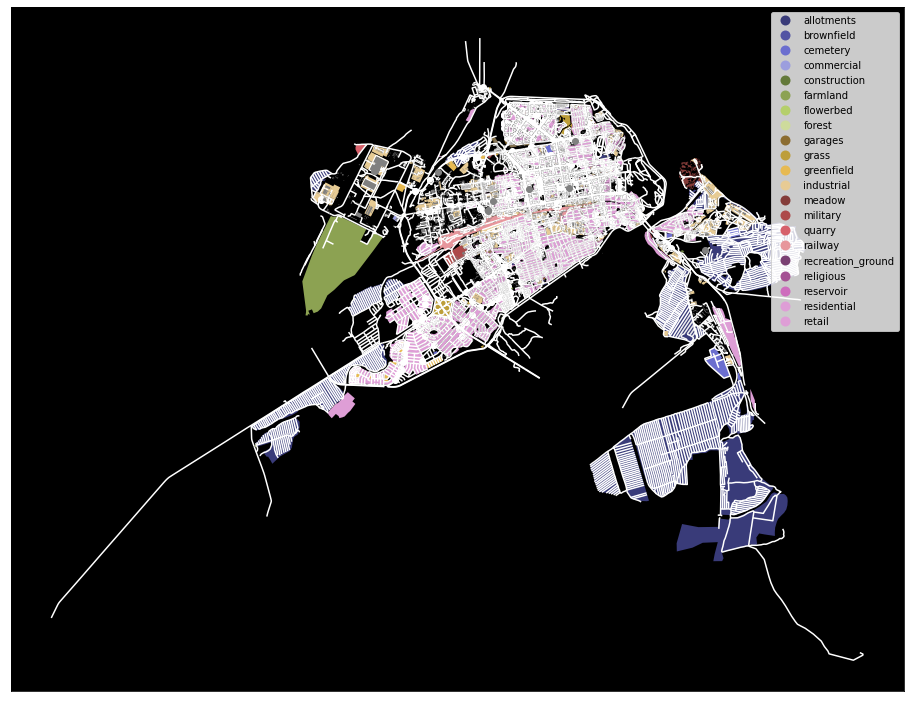

In [2]:
# New geometries module
MK = ox.geometries_from_place("Abakan, Russia", tags={'highway':True, 'landuse':True, 'building':True})

# Presentation code
MK.to_crs(epsg=4326, inplace=True)

fig,ax = plt.subplots(figsize=(16,16))
MK[MK['landuse'].notna()].plot(ax=ax, column='landuse', cmap='tab20b', legend=True)
MK[MK['highway'].notna()].plot(ax=ax, color='white')
MK[MK['building'].notna()].plot(ax=ax, color='grey', zorder=3)
ax.set_facecolor('black')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

# Точки из .xml на карте

In [14]:
xml_points = pd.read_csv("../res/xml_nodes_id_lat_lon.csv", usecols = ['lat','lon'])
xml_points

,lat,lon
0,53.661313,91.549775
1,53.671062,91.569881
2,53.674907,91.571948
3,53.678731,91.573432
4,53.690491,91.577868
...,...,...
48917,53.717067,91.658915
48918,53.716533,91.657216
48919,53.717483,91.658862
48920,53.716364,91.656068


In [15]:
from shapely.geometry import Point

geometry = [ Point(xy) for xy in zip(xml_points['lon'], xml_points['lat']) ]
geos = gpd.GeoDataFrame(geometry=geometry)
geos

,geometry
0,POINT (91.54977 53.66131)
1,POINT (91.56988 53.67106)
2,POINT (91.57195 53.67491)
3,POINT (91.57343 53.67873)
4,POINT (91.57787 53.69049)
...,...
48917,POINT (91.65891 53.71707)
48918,POINT (91.65722 53.71653)
48919,POINT (91.65886 53.71748)
48920,POINT (91.65607 53.71636)


C:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are depreca

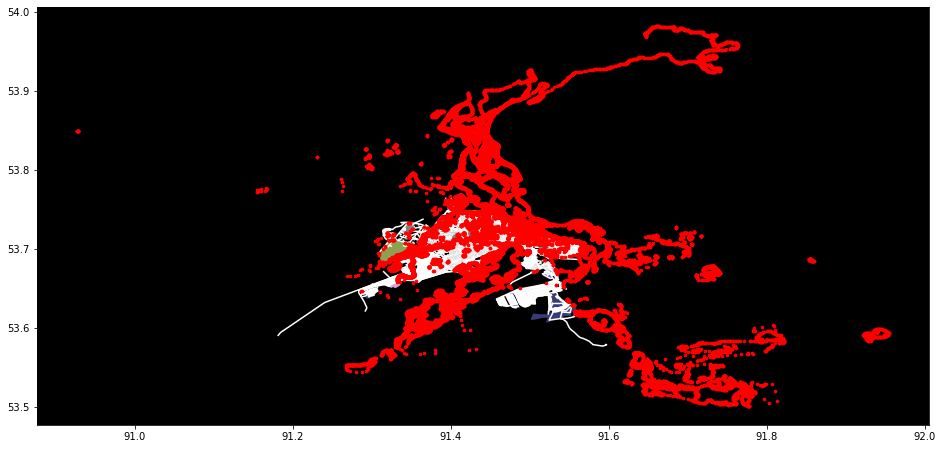

In [16]:
# Presentation code
MK.to_crs(epsg=4326, inplace=True)

fig,ax = fig, axes = plt.subplots(figsize=(16,16))
MK[MK['landuse'].notna()].plot(ax=ax, column='landuse', cmap='tab20b', legend=False, zorder=1)
MK[MK['highway'].notna()].plot(ax=ax, color='white', zorder=2)
MK[MK['building'].notna()].plot(ax=ax, color='grey', zorder=2.5)
ax.set_facecolor('black')
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)

geos.plot(ax=ax, markersize=7, color='red', zorder=3)

plt.savefig("../pngs/xml_nodes.png")

# Все кластеризованные точки на карте

In [4]:
cluster_points = pd.read_csv("../res/cluster_centers.csv")
cluster_points.pop('Unnamed: 0')
cluster_points.columns=['latitude', 'longitude']
cluster_points

,latitude,longitude
0,53.704767,91.433073
1,53.735717,91.469943
2,53.653767,91.576902
3,53.804274,91.337155
4,53.769334,91.396471
...,...,...
8435,53.702373,91.404976
8436,53.762392,91.394026
8437,53.725927,91.401658
8438,53.824557,91.343661


In [5]:
from shapely.geometry import Point

geometry = [ Point(xy) for xy in zip(cluster_points['longitude'], cluster_points['latitude']) ]

geos = gpd.GeoDataFrame(geometry=geometry)
geos

,geometry
0,POINT (91.43307 53.70477)
1,POINT (91.46994 53.73572)
2,POINT (91.57690 53.65377)
3,POINT (91.33716 53.80427)
4,POINT (91.39647 53.76933)
...,...
8435,POINT (91.40498 53.70237)
8436,POINT (91.39403 53.76239)
8437,POINT (91.40166 53.72593)
8438,POINT (91.34366 53.82456)


C:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are depreca

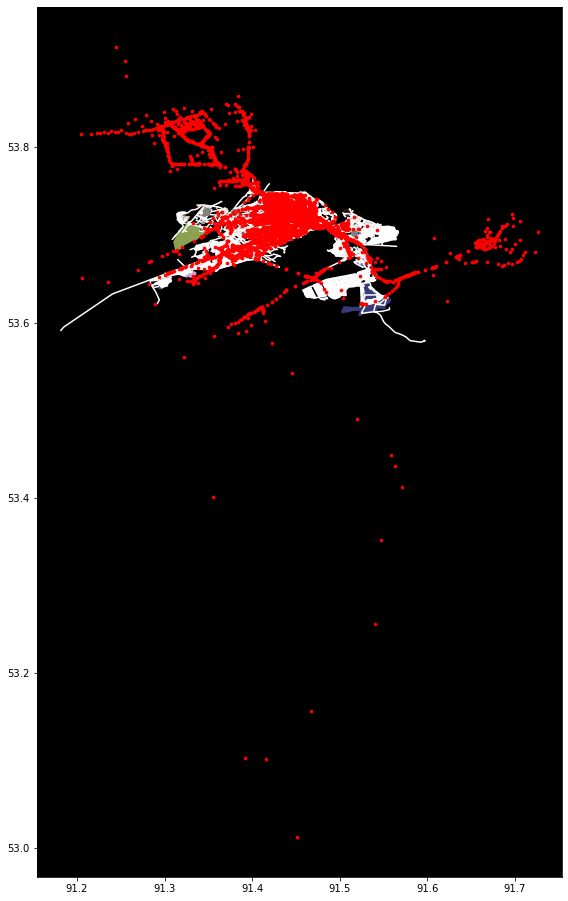

In [6]:
# New geometries module
#MK = ox.geometries_from_place("Abakan, Russia", tags={'highway':True, 'landuse':True, 'building':True})

# Presentation code
MK.to_crs(epsg=4326, inplace=True)

fig,ax = fig, axes = plt.subplots(figsize=(16,16))
MK[MK['landuse'].notna()].plot(ax=ax, column='landuse', cmap='tab20b', legend=False, zorder=1)
MK[MK['highway'].notna()].plot(ax=ax, color='white', zorder=2)
MK[MK['building'].notna()].plot(ax=ax, color='grey', zorder=2.5)
ax.set_facecolor('black')
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)

geos.plot(ax=ax, markersize=7, color='red', zorder=3)

plt.savefig("../pngs/centroids.png")

 # Сырые данные из датасета

In [34]:
coords = pk.load(open('../datasets/abakan_full_routes_deeptte_urban.pkl', 'rb')).edges_geo

raw_coords = []
for pair in coords:
    for coord in pair:
        raw_coords.append(coord)

len(raw_coords)

C:\Users\VladimirMashurov\AppData\Local\Temp\ipykernel_16124\3034108618.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='../datasets/abakan_full_routes_deeptte_urban.pkl'>
  coords = pk.load(open('../datasets/abakan_full_routes_deeptte_urban.pkl', 'rb')).edges_geo


3926610

In [35]:
geometry = [ Point(xy) for xy in raw_coords ]

geos = gpd.GeoDataFrame(geometry=geometry)
geos

,geometry
0,POINT (91.44753 53.70870)
1,POINT (91.44771 53.70874)
2,POINT (91.44614 53.70985)
3,POINT (91.44680 53.71052)
4,POINT (91.44765 53.71032)
...,...
3926605,POINT (91.45617 53.72463)
3926606,POINT (91.45622 53.72492)
3926607,POINT (91.45596 53.72475)
3926608,POINT (91.45599 53.72467)


C:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are depreca

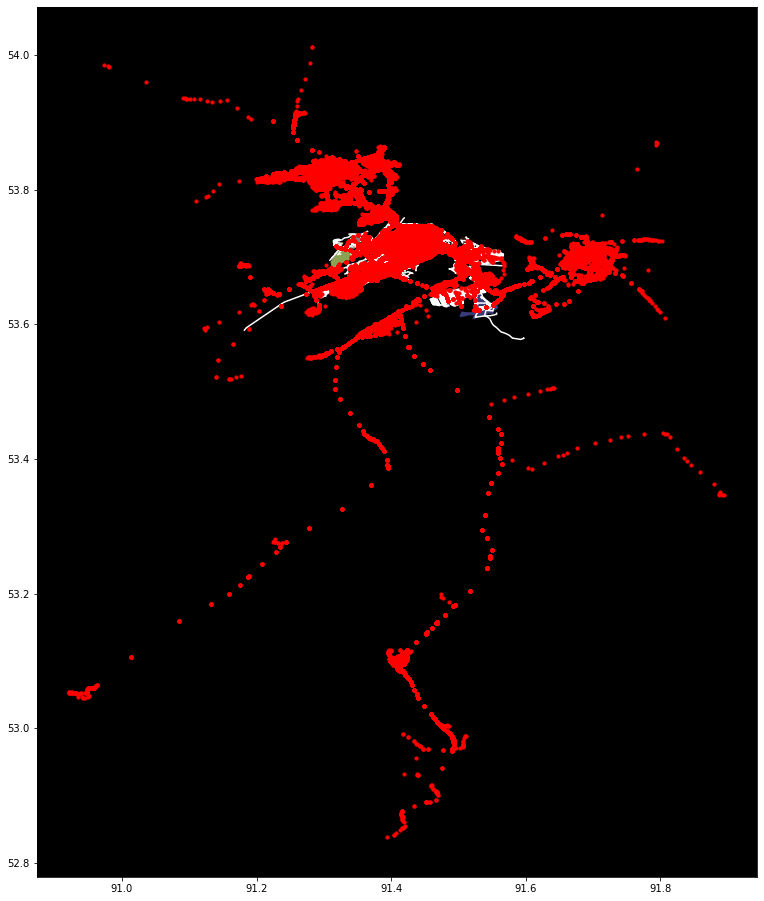

In [28]:
# Presentation code
MK.to_crs(epsg=4326, inplace=True)

fig,ax = fig, axes = plt.subplots(figsize=(16,16))
MK[MK['landuse'].notna()].plot(ax=ax, column='landuse', cmap='tab20b', legend=False, zorder=1)
MK[MK['highway'].notna()].plot(ax=ax, color='white', zorder=2)
MK[MK['building'].notna()].plot(ax=ax, color='grey', zorder=2.5)
ax.set_facecolor('black')
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)

geos.plot(ax=ax, markersize=10, color='red', zorder=3)

plt.savefig("../pngs/raw.png")

# Границы Абакана

In [32]:
x_min, y_min, x_max, y_max = MK.total_bounds
print(x_min, y_min, x_max, y_max)

91.1812051 53.5775502 91.5972678 53.7663598


In [ ]:
geos.within()

# Патчи

C:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are depreca

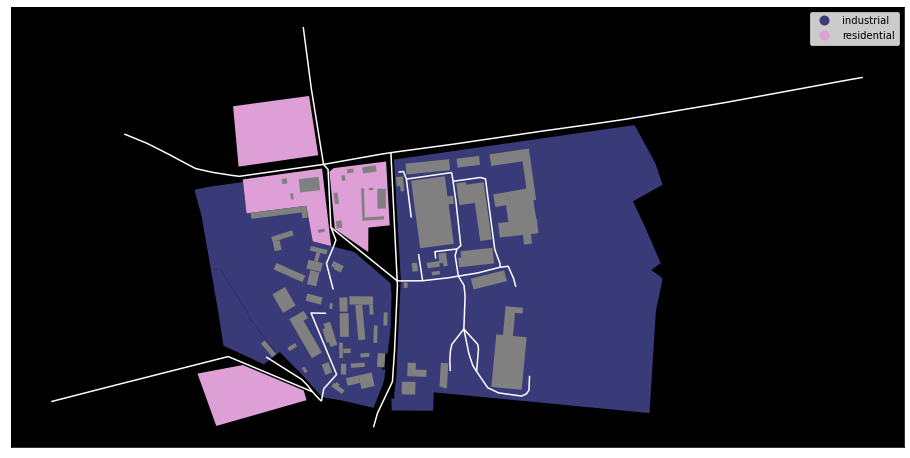

In [42]:
# New geometries module
MK = ox.geometries_from_point([53.7087046931, 91.44752843785], dist=200, tags={'highway':True, 'landuse':True, 'building':True})

# Presentation code
MK.to_crs(epsg=4326, inplace=True)

fig,ax = plt.subplots(ncols=1, nrows=1, figsize=(16,16))
MK[MK['landuse'].notna()].plot(ax=ax, column='landuse', cmap='tab20b', legend=True)
MK[MK['highway'].notna()].plot(ax=ax, color='white')
MK[MK['building'].notna()].plot(ax=ax, color='grey', zorder=3)
ax.set_facecolor('black')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)